In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path=r'E:\notes\LetsGrowMore\Task02\Global'
os.chdir(path)

In [3]:
ds=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1',low_memory=False)
ds.head(10)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region  ...  \
0  Dominican Republic       2  ...   
1              Mexico       1  ...   
2         Philippines       5  ...   
3              Greece       8  ...   
4               Japan       4  ...   
5       United States       1  ...   
6             Uruguay       3  ...   
7       United States       1  ...   
8       United States       1  ...   
9       United States       1  ...   

                                            addnotes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  The Cairo Chief of Police, William Petersen, r...   
6                                                NaN   
7  Damages were estimated to be between $20,000-$...   
8  The New Years Gang issue a communiqué to a loc...   
9  Karl Armstrong's girlfriend, Lynn Schultz, dro...   

                                              scite1  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Police Chief Quits," Washington Post, January...   
6                                                NaN   
7  Committee on Government Operations United Stat...   
8  Tom Bates, "Rads: The 1970 Bombing of the Army...   
9  Committee on Government Operations United Stat...   

                                              scite2  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  "Cairo Police Chief Quits; Decries Local 'Mili...   
6                                                NaN   
7  Christopher Hewitt, "Political Violence and Te...   
8  David Newman, Sandra Sutherland, and Jon Stewa...   
9  Tom Bates, "Rads: The 1970 Bombing of the Army...   

                                              scite3        dbsource  INT_LOG  \
0                                                NaN            PGIS        0   
1                                                NaN            PGIS        0   
2                                                NaN            PGIS       -9   
3                                                NaN            PGIS       -9   
4                                                NaN            PGIS       -9   
5  Christopher Hewitt, "Political Violence and Te...  Hewitt Project       -9   
6                                                NaN            PGIS        0   
7                                                NaN  Hewitt Project       -9   
8  The Wisconsin Cartographers' Guild, "Wisconsin...  Hewitt Project        0   
9  David Newman, Sandra Sutherland, 

In [4]:
print(ds.info())  # Overview of dataset
print(ds.head())  # First few records
print(ds.describe())  # Summary statistics for numerical columns
print(ds.isnull().sum())  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3     

In [5]:
ds.shape

(181691, 135)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
ds.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
# Keeping only relevant columns
columns_to_keep = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'attacktype1_txt', 
                   'targtype1_txt', 'nkill', 'nwound', 'weaptype1_txt', 'latitude', 'longitude']
ds_clean = ds[columns_to_keep]
# Fill missing values for important numerical columns (nkill, nwound) with 0
ds_clean['nkill'] = ds_clean['nkill'].fillna(0)
ds_clean['nwound'] = ds_clean['nwound'].fillna(0)

# Dropping rows with missing values for categorical columns (e.g., country, city)
ds_clean = ds_clean.dropna(subset=['country_txt', 'city', 'latitude', 'longitude'])

# Verifying if the data is clean
print(ds_clean.isnull().sum())

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
city               0
attacktype1_txt    0
targtype1_txt      0
nkill              0
nwound             0
weaptype1_txt      0
latitude           0
longitude          0
dtype: int64


C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_32520\3764827567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['nkill'] = ds_clean['nkill'].fillna(0)
C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_32520\3764827567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['nwound'] = ds_clean['nwound'].fillna(0)


In [9]:
# Summary statistics for casualties (nkill and nwound)
print(ds_clean[['nkill', 'nwound']].describe())
# Number of attacks per year
attacks_per_year = ds_clean['iyear'].value_counts().sort_index()
print(attacks_per_year)
# Top 10 countries by number of attacks
top_countries = ds_clean['country_txt'].value_counts().head(10)
print(top_countries)

               nkill         nwound
count  176707.000000  176707.000000
mean        2.233375       2.915578
std        11.184532      34.765091
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         2.000000       2.000000
max      1570.000000    8191.000000
iyear
1970      643
1971      463
1972      551
1973      465
1974      577
1975      727
1976      900
1977     1292
1978     1455
1979     2533
1980     2561
1981     2469
1982     2408
1983     2670
1984     3198
1985     2680
1986     2680
1987     2989
1988     3471
1989     4147
1990     3648
1991     4405
1992     4832
1994     3295
1995     2920
1996     2909
1997     2996
1998      891
1999     1341
2000     1772
2001     1883
2002     1310
2003     1263
2004     1137
2005     1985
2006     2662
2007     3164
2008     4668
2009     4557
2010     4754
2011     5002
2012     8470
2013    11926
2014    16794
2015    14861
2016    13530
2017    10853
Name: count,

In [10]:
# Group by regions and countries
region_wise = ds_clean['region_txt'].value_counts()
country_wise = ds_clean['country_txt'].value_counts().head(10)
print(region_wise)
print(country_wise)

region_txt
Middle East & North Africa     49550
South Asia                     44329
South America                  18110
Sub-Saharan Africa             17011
Western Europe                 16482
Southeast Asia                 11701
Central America & Caribbean     9344
Eastern Europe                  5113
North America                   3450
East Asia                        794
Central Asia                     547
Australasia & Oceania            276
Name: count, dtype: int64
country_txt
Iraq              24471
Pakistan          14307
Afghanistan       12500
India             11801
Colombia           7835
Philippines        6528
Peru               5808
United Kingdom     5227
El Salvador        4846
Turkey             4126
Name: count, dtype: int64


In [11]:
# Most common attack types
attack_type_distribution = ds_clean['attacktype1_txt'].value_counts()
target_type_distribution = ds_clean['targtype1_txt'].value_counts()
print(attack_type_distribution)
print(target_type_distribution)

attacktype1_txt
Bombing/Explosion                      86723
Armed Assault                          40886
Assassination                          18792
Hostage Taking (Kidnapping)            10646
Facility/Infrastructure Attack         10173
Unknown                                 6914
Unarmed Assault                          982
Hostage Taking (Barricade Incident)      962
Hijacking                                629
Name: count, dtype: int64
targtype1_txt
Private Citizens & Property       42373
Military                          26879
Police                            24104
Government (General)              20739
Business                          20230
Transportation                     6539
Unknown                            5828
Utilities                          5544
Religious Figures/Institutions     4373
Educational Institution            4248
Government (Diplomatic)            3511
Terrorists/Non-State Militia       2971
Journalists & Media                2854
Violent Political P

In [12]:
# Group by region to get the sum of casualties
region_casualties = ds_clean.groupby('region_txt')[['nkill', 'nwound']].sum()
print(region_casualties)
# Analyzing the total casualties by attack type
attack_type_casualties = ds_clean.groupby('attacktype1_txt')[['nkill', 'nwound']].sum()
print(attack_type_casualties)

                                nkill    nwound
region_txt                                     
Australasia & Oceania           149.0     259.0
Central America & Caribbean   24635.0    8183.0
Central Asia                    909.0    1914.0
East Asia                      1145.0    9210.0
Eastern Europe                 7370.0   12030.0
Middle East & North Africa   134891.0  212458.0
North America                  4916.0   21531.0
South America                 26179.0   16231.0
South Asia                    99389.0  139268.0
Southeast Asia                13427.0   24358.0
Sub-Saharan Africa            74970.0   51520.0
Western Europe                 6673.0   18241.0
                                        nkill    nwound
attacktype1_txt                                        
Armed Assault                        149341.0   74192.0
Assassination                         23959.0   13638.0
Bombing/Explosion                    154941.0  368784.0
Facility/Infrastructure Attack         3587.0   

C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_32520\1910426065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_wise.index, x=region_wise.values, palette='coolwarm')


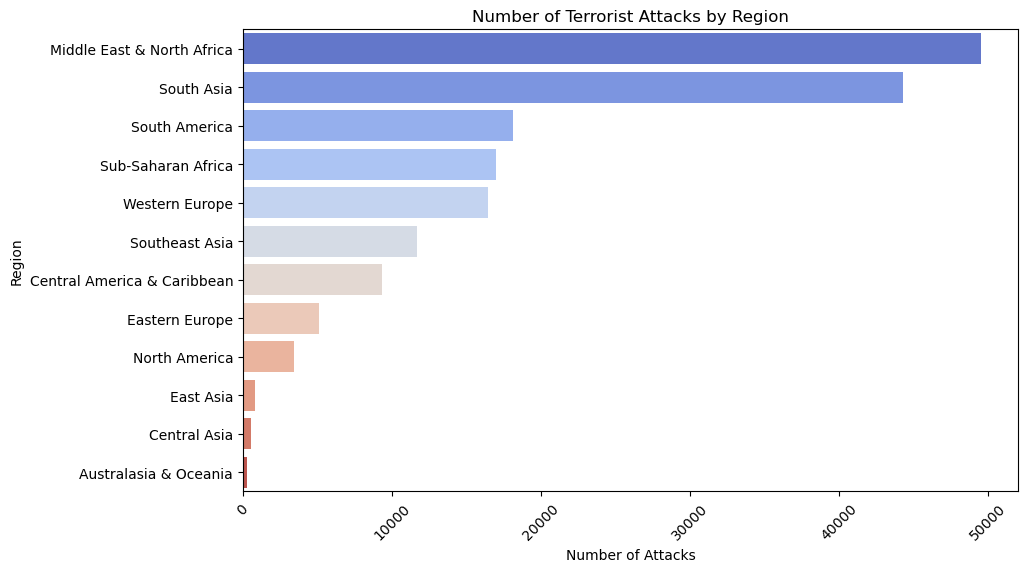

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(y=region_wise.index, x=region_wise.values, palette='coolwarm')
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_32520\1485123253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_wise.index, x=country_wise.values, palette='magma')


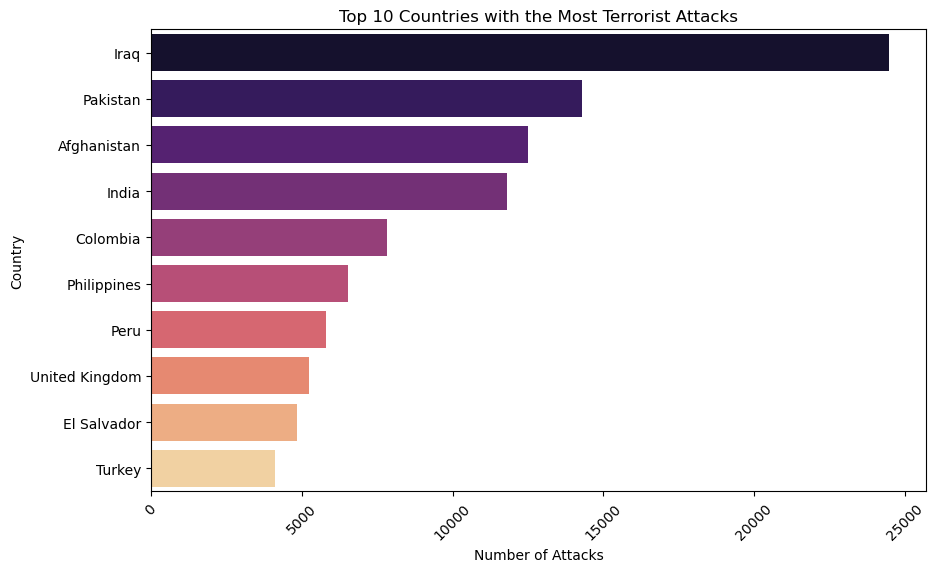

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(y=country_wise.index, x=country_wise.values, palette='magma')
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

C:\Users\Souymo Tewari\AppData\Local\Temp\ipykernel_32520\835042681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=attack_type_distribution.index, x=attack_type_distribution.values, palette='Set2')


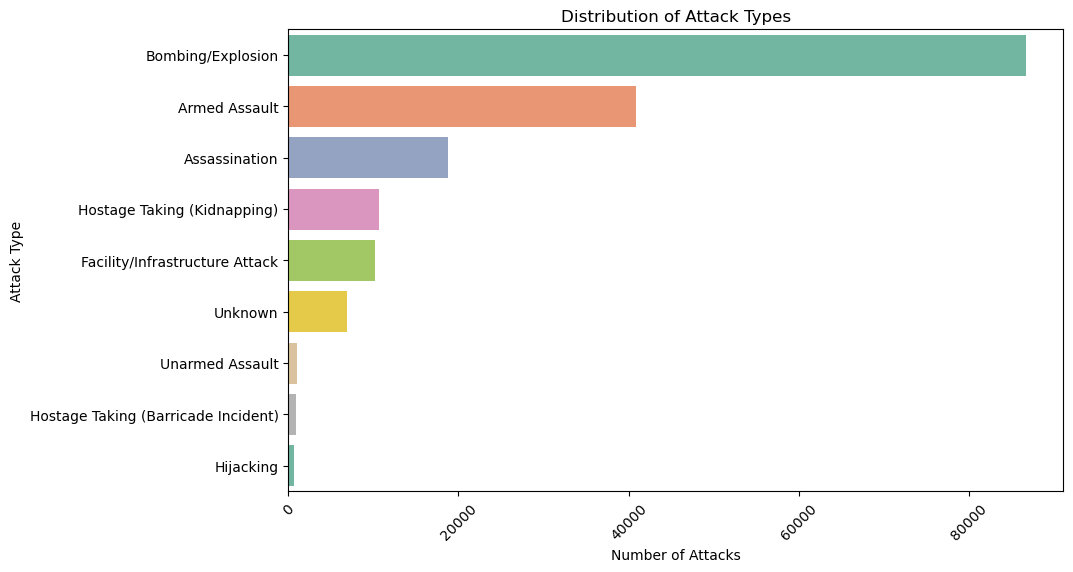

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y=attack_type_distribution.index, x=attack_type_distribution.values, palette='Set2')
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.xticks(rotation=45)
plt.show()

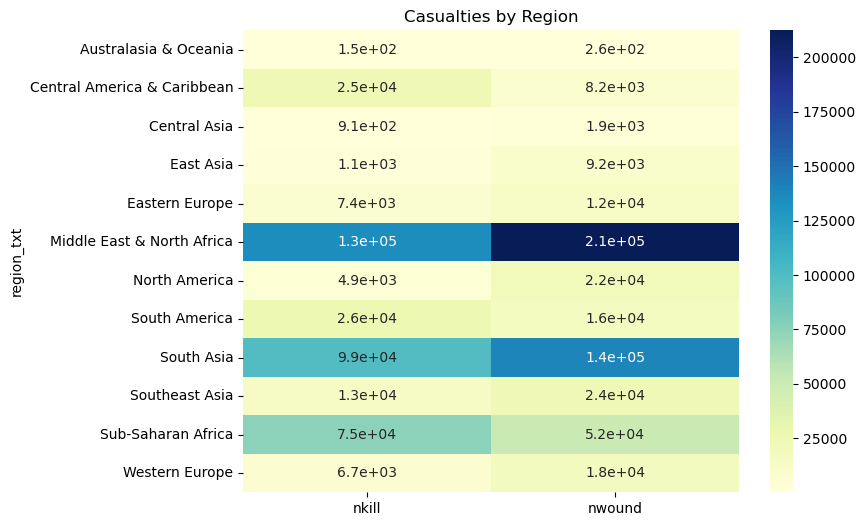

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(region_casualties, annot=True, cmap='YlGnBu')
plt.title('Casualties by Region')
plt.show()

# Terrorist Activities By Region In Each Year

In [17]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176707 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            176707 non-null  int64  
 1   imonth           176707 non-null  int64  
 2   iday             176707 non-null  int64  
 3   country_txt      176707 non-null  object 
 4   region_txt       176707 non-null  object 
 5   city             176707 non-null  object 
 6   attacktype1_txt  176707 non-null  object 
 7   targtype1_txt    176707 non-null  object 
 8   nkill            176707 non-null  float64
 9   nwound           176707 non-null  float64
 10  weaptype1_txt    176707 non-null  object 
 11  latitude         176707 non-null  float64
 12  longitude        176707 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 18.9+ MB


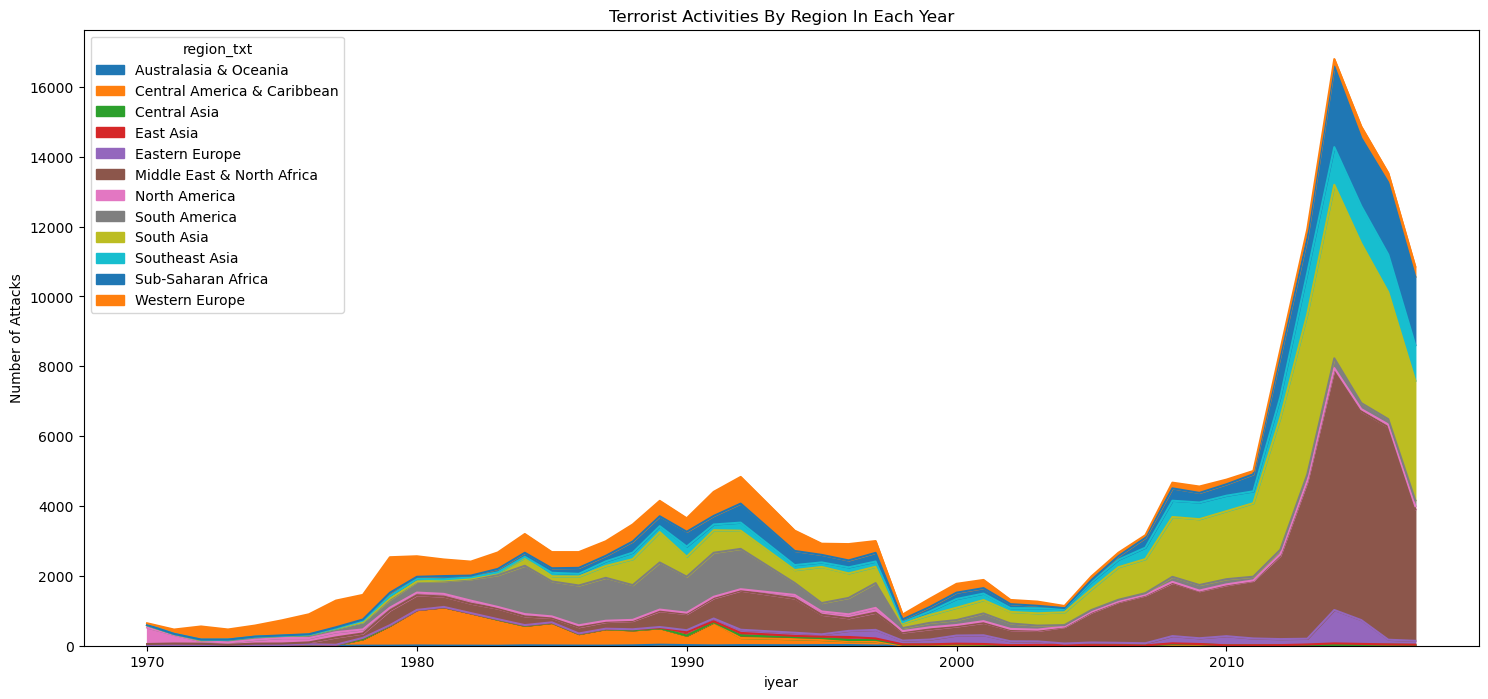

In [18]:
pd.crosstab(ds_clean.iyear, ds_clean.region_txt).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

# REGION AFFECTED BY TERRORIST ATTACK

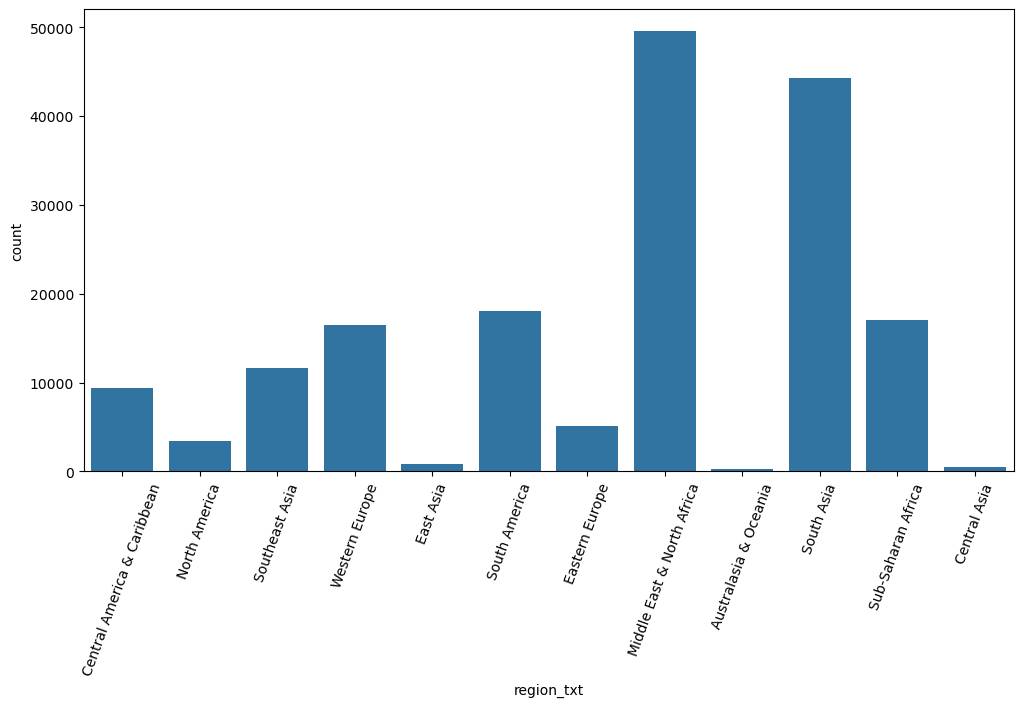

In [19]:
ds_clean['region_txt'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='region_txt',data=ds_clean)
plt.xticks(rotation=70)
plt.show()

In [20]:
import plotly.express as px

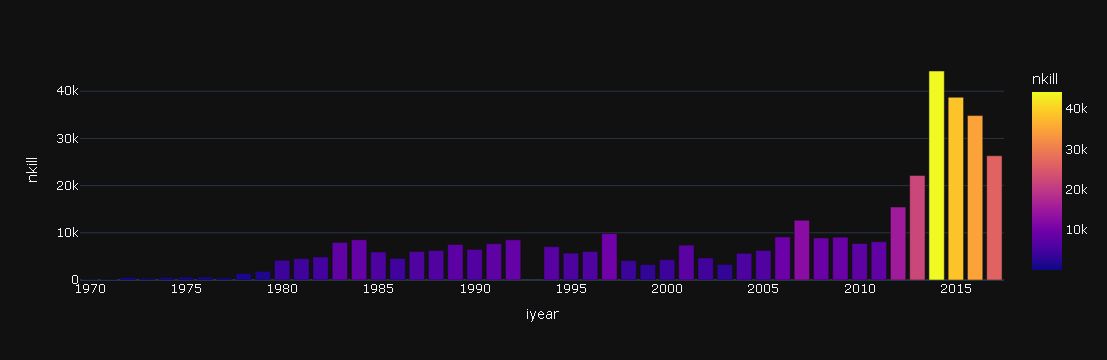

In [21]:
year_cas = ds_clean.groupby('iyear').nkill.sum().to_frame().reset_index()
year_cas.columns = ['iyear','nkill']
px.bar(data_frame=year_cas,x = 'iyear',y = 'nkill',color='nkill',template='plotly_dark')

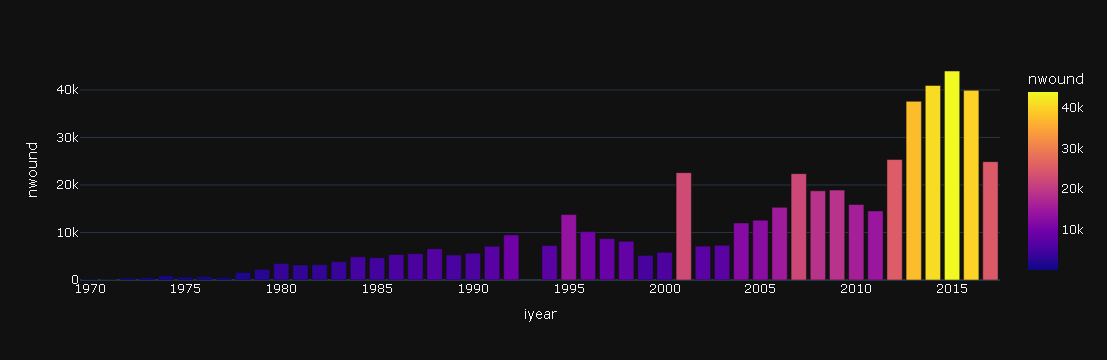

In [22]:
year_cas = ds_clean.groupby('iyear').nwound.sum().to_frame().reset_index()
year_cas.columns = ['iyear','nwound']
px.bar(data_frame=year_cas,x = 'iyear',y = 'nwound',color='nwound',template='plotly_dark')

# We can clearly see that the highest casualties are in 2015 from above two graphs.

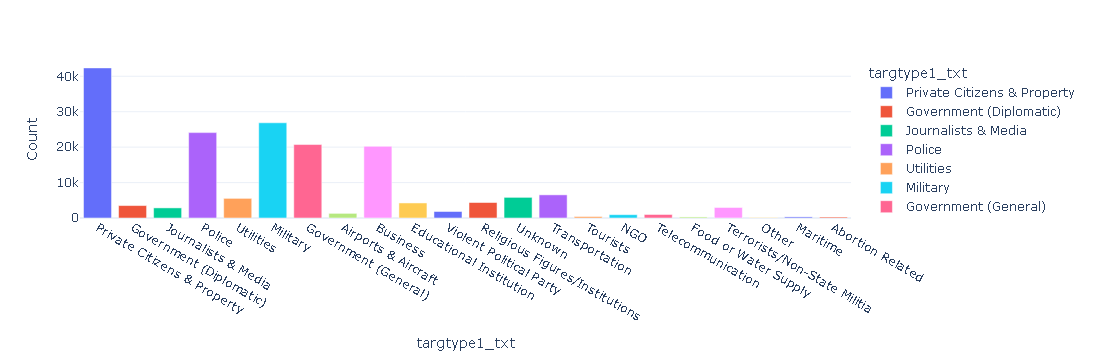

In [23]:
from collections import Counter
target = list(ds_clean['targtype1_txt'])
target_map = dict(Counter(target))
target_ds = pd.DataFrame(target_map.items())
target_ds.columns = ['targtype1_txt','Count']
px.bar(data_frame=target_ds,x = 'targtype1_txt',y = 'Count',color='targtype1_txt',template='plotly_white')

In [24]:
# Observation
# Private Citizens and Property Counts the highest amongst all.
# Analysing the Type of Attacks:-
#Counting the Casuallities according the Attack Type
AttackType=ds_clean.pivot_table(columns='attacktype1_txt',values='nkill',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

In [25]:
AttackType=ds_clean.pivot_table(columns='attacktype1_txt',values='nwound',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

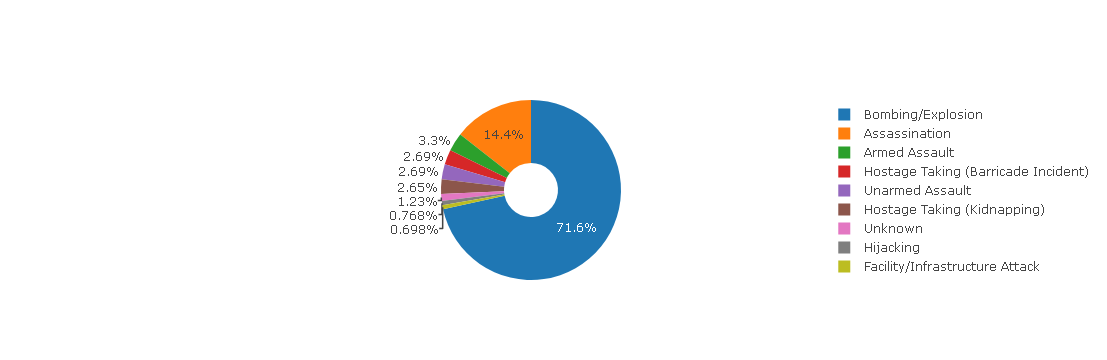

In [26]:
import plotly.graph_objects as go
labels = AttackType.columns.tolist()
attack=AttackType.T
values=attack.values.tolist()
values = sum(values,[])
attack_type = list(ds_clean['attacktype1_txt'].unique())
fig = go.Figure(data=[go.Pie(labels = attack_type,values=values,hole=.3)])
fig.update_layout(template = 'gridon')
fig.show()

Text(0.5, 1.0, 'Favorite Targets')

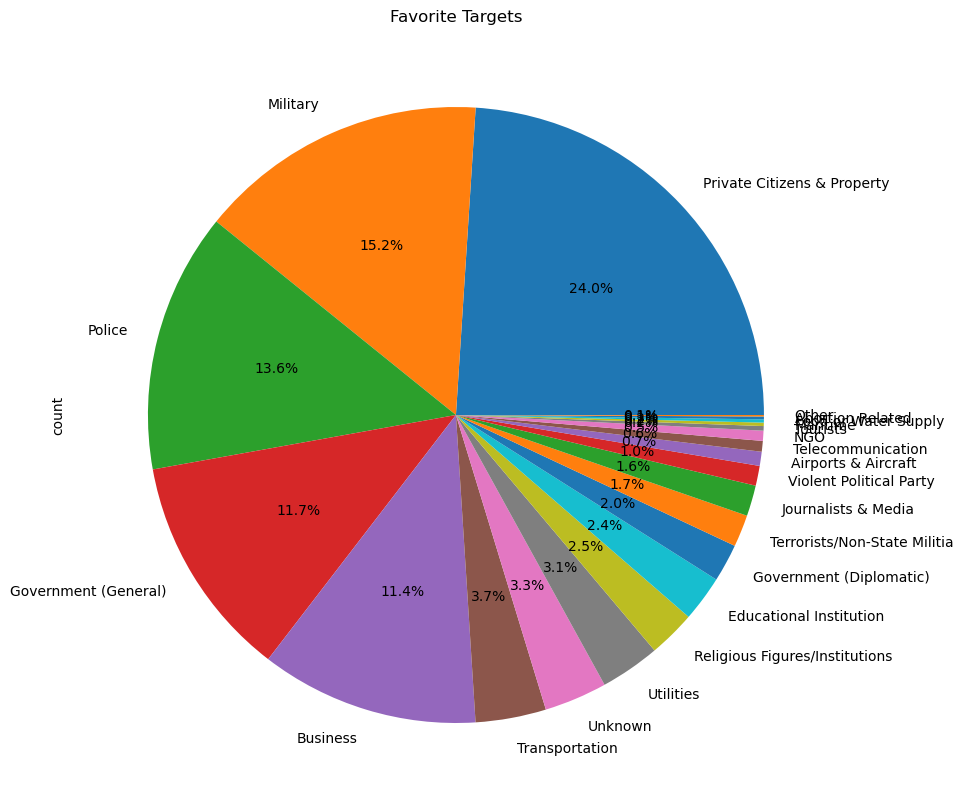

In [27]:
ds_clean['targtype1_txt'].value_counts().plot(kind='pie',figsize=[12,10],autopct='%1.1f%%')
plt.title('Favorite Targets')

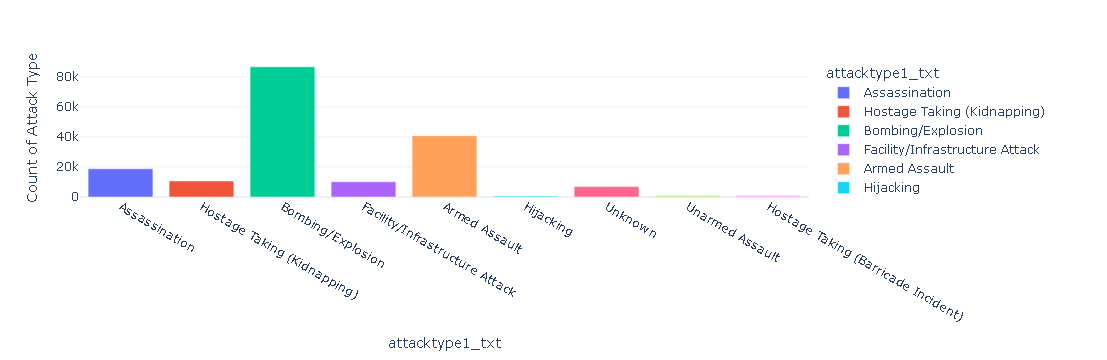

In [28]:
# Observation
# Bombing and Explosion method shows the highest chossen type.
# Count of Weapon Chssen for Attack.
from collections import Counter
values = list(ds_clean['attacktype1_txt'])
value_map = dict(Counter(values))
value_dataset = pd.DataFrame(value_map.items())
value_dataset.columns = ["attacktype1_txt","Count of Attack Type"]
px.bar(data_frame=value_dataset,x = 'attacktype1_txt',y = 'Count of Attack Type',color = 'attacktype1_txt',template="plotly_white")

<Axes: ylabel='count'>

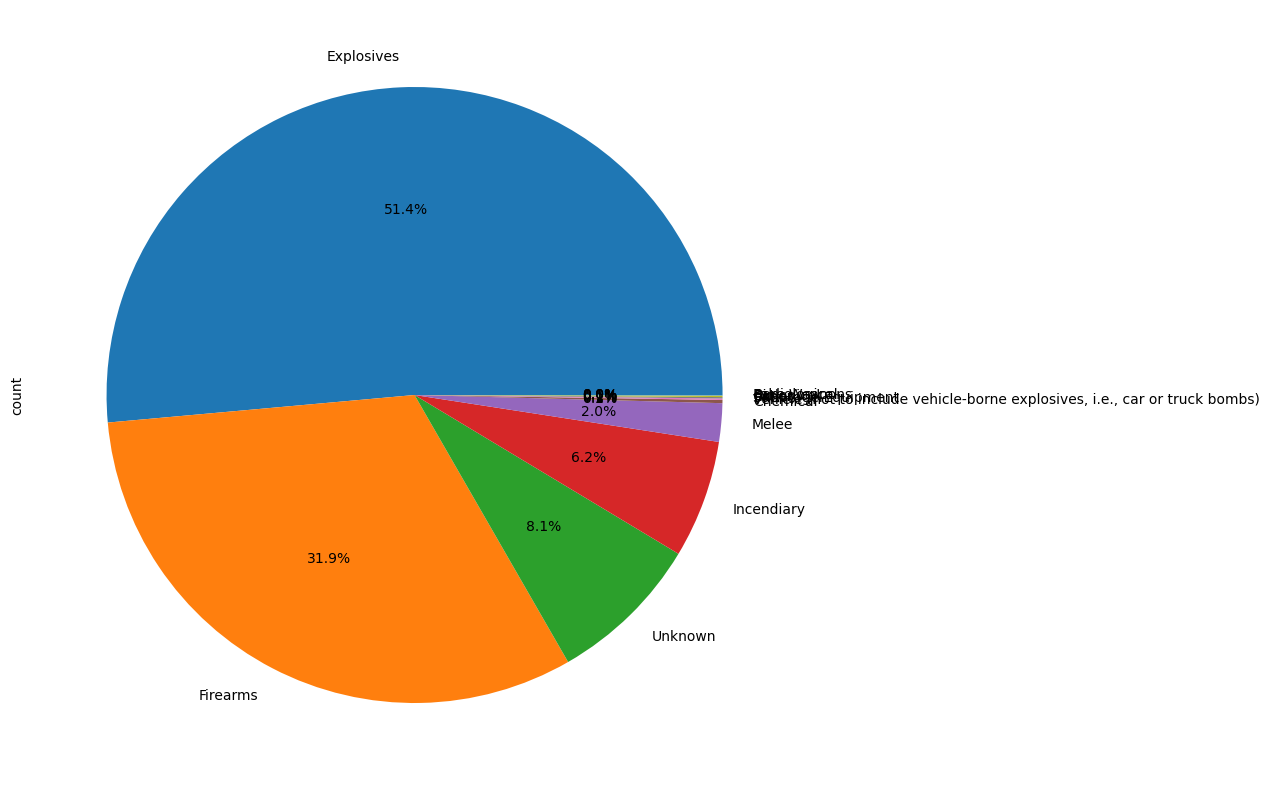

In [29]:
ds_clean['weaptype1_txt'].value_counts().plot(kind='pie',figsize=[15,10],autopct='%1.1f%%')

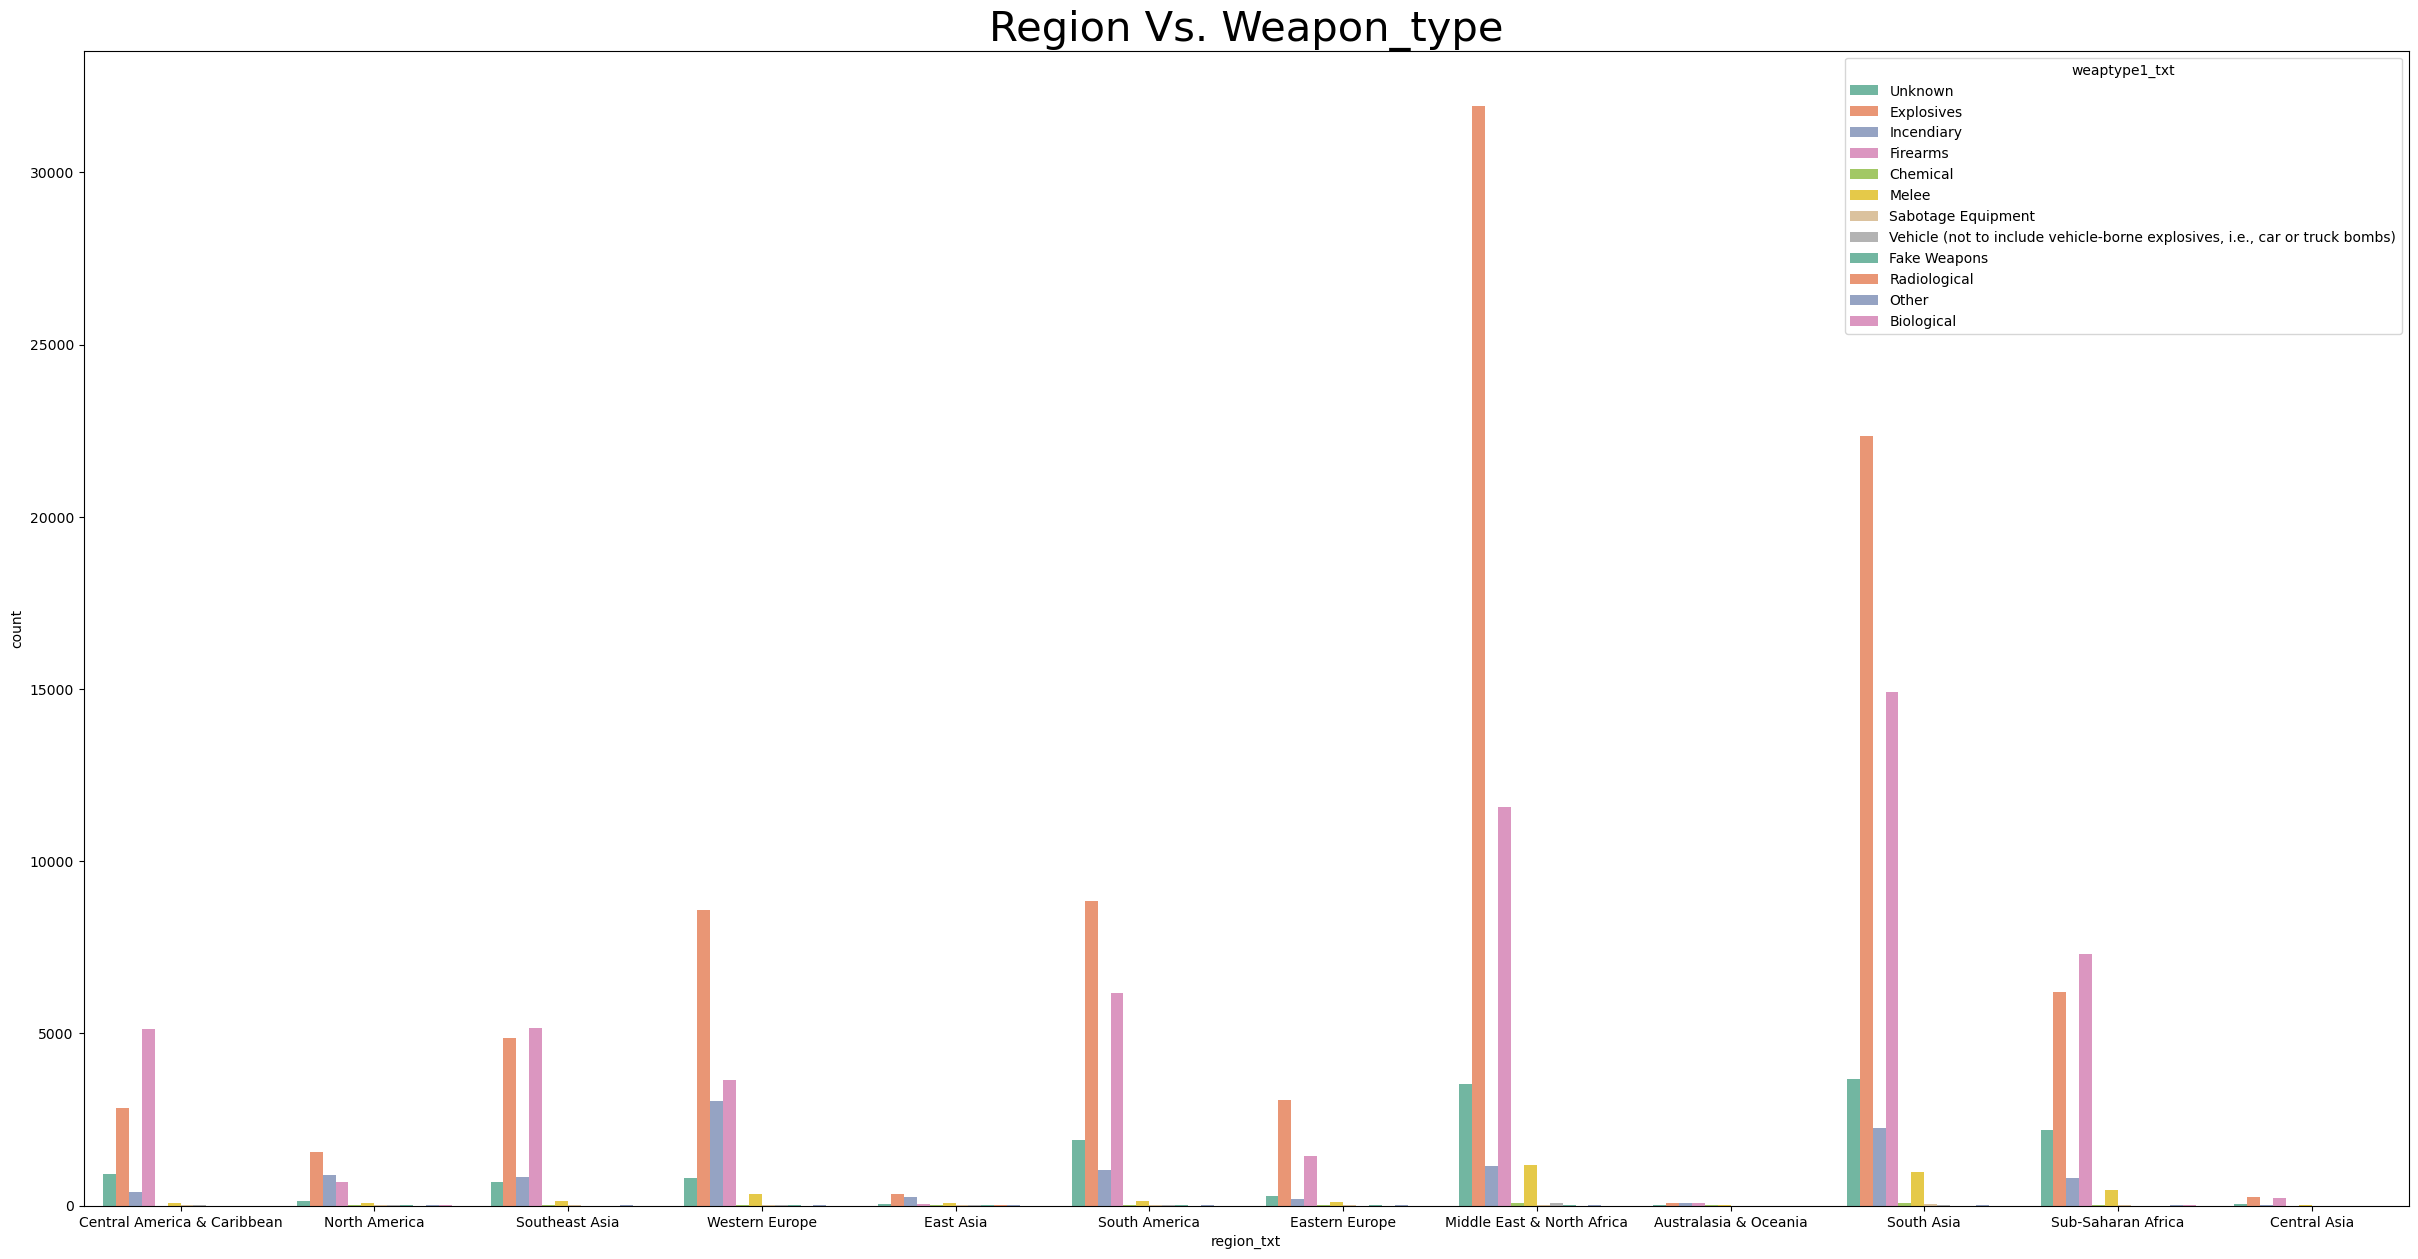

In [30]:
plt.subplots(figsize = (30,15))
sns.countplot(x="region_txt", hue ='weaptype1_txt', data = ds_clean,palette = "Set2")
plt.title('Region Vs. Weapon_type', fontsize = 30)
plt.show()